# **General Statistics**

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [45]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [46]:
df = pd.read_csv('/content/drive/MyDrive/brain_stroke.csv')
print(df.head())

   gender   age  hypertension  heart_disease ever_married      work_type  \
0    Male  67.0             0              1          Yes        Private   
1    Male  80.0             0              1          Yes        Private   
2  Female  49.0             0              0          Yes        Private   
3  Female  79.0             1              0          Yes  Self-employed   
4    Male  81.0             0              0          Yes        Private   

  Residence_type  avg_glucose_level   bmi   smoking_status  stroke  
0          Urban             228.69  36.6  formerly smoked       1  
1          Rural             105.92  32.5     never smoked       1  
2          Urban             171.23  34.4           smokes       1  
3          Rural             174.12  24.0     never smoked       1  
4          Urban             186.21  29.0  formerly smoked       1  


In [47]:
# Summary statistics for numerical columns
print(df.describe())

# Summary statistics for categorical columns
print(df.describe(include=['object']))

# Calculate the mode for categorical variables
print(df.mode())

               age  hypertension  heart_disease  avg_glucose_level  \
count  4981.000000   4981.000000    4981.000000        4981.000000   
mean     43.419859      0.096165       0.055210         105.943562   
std      22.662755      0.294848       0.228412          45.075373   
min       0.080000      0.000000       0.000000          55.120000   
25%      25.000000      0.000000       0.000000          77.230000   
50%      45.000000      0.000000       0.000000          91.850000   
75%      61.000000      0.000000       0.000000         113.860000   
max      82.000000      1.000000       1.000000         271.740000   

               bmi       stroke  
count  4981.000000  4981.000000  
mean     28.498173     0.049789  
std       6.790464     0.217531  
min      14.000000     0.000000  
25%      23.700000     0.000000  
50%      28.100000     0.000000  
75%      32.600000     0.000000  
max      48.900000     1.000000  
        gender ever_married work_type Residence_type smoking_st

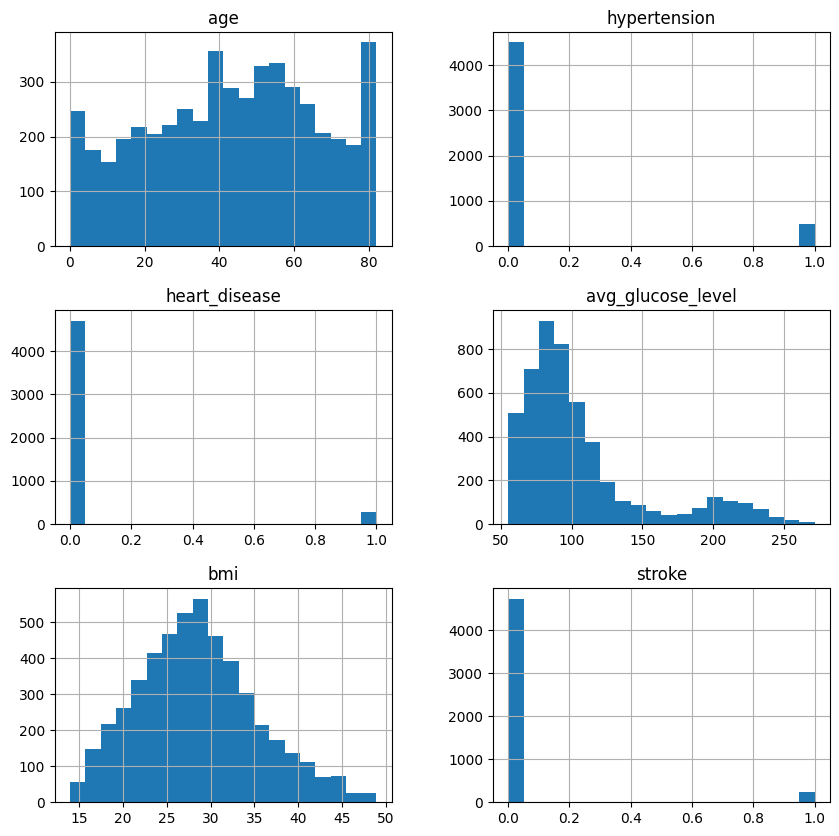

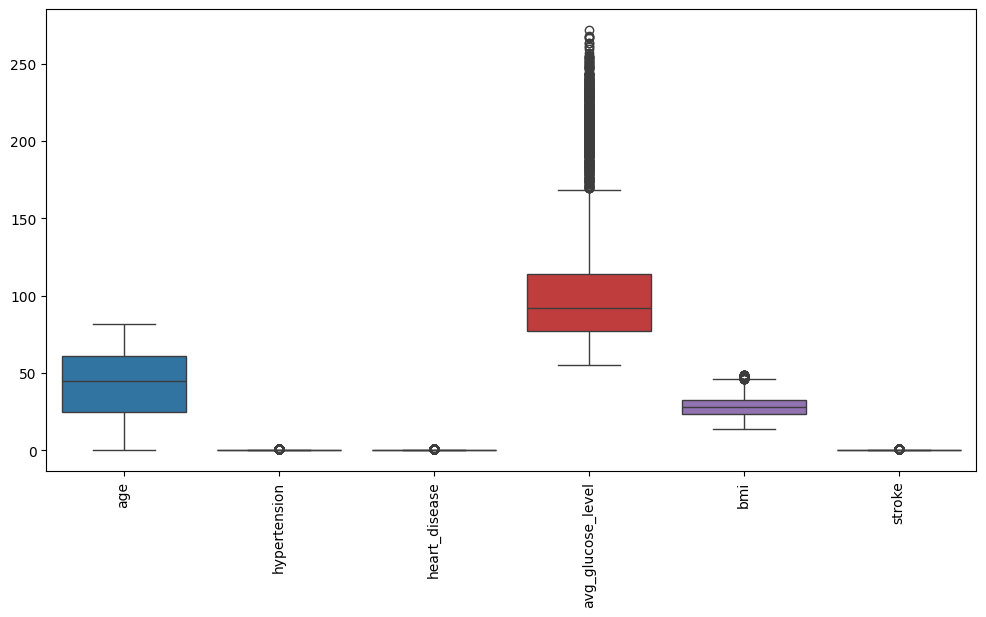

In [48]:
# Histograms for numerical variables
df.hist(bins=20, figsize=(10, 10))
plt.show()

# Boxplots to check for outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

In [49]:
# Mean, median, and standard deviation for numerical columns
mean_values = df.mean(numeric_only=True) # Set numeric_only to True to only calculate the mean of numeric columns
median_values = df.median(numeric_only=True) # Set numeric_only to True to only calculate the median of numeric columns
std_values = df.std(numeric_only=True) # Set numeric_only to True to only calculate the std of numeric columns

print("Mean values:\n", mean_values)
print("Median values:\n", median_values)
print("Standard Deviation:\n", std_values)

Mean values:
 age                   43.419859
hypertension           0.096165
heart_disease          0.055210
avg_glucose_level    105.943562
bmi                   28.498173
stroke                 0.049789
dtype: float64
Median values:
 age                  45.00
hypertension          0.00
heart_disease         0.00
avg_glucose_level    91.85
bmi                  28.10
stroke                0.00
dtype: float64
Standard Deviation:
 age                  22.662755
hypertension          0.294848
heart_disease         0.228412
avg_glucose_level    45.075373
bmi                   6.790464
stroke                0.217531
dtype: float64


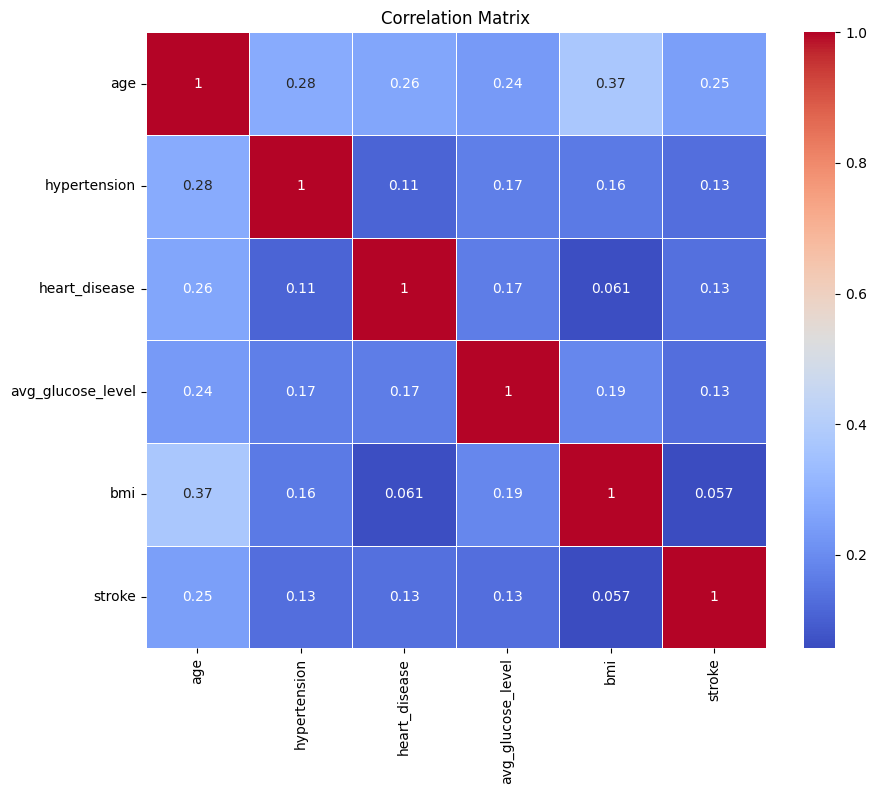

In [50]:
# Correlation matrix for numerical columns only
correlation_matrix = df.corr(numeric_only=True)

# Heatmap for the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

Gender counts:
 gender
Female    2907
Male      2074
Name: count, dtype: int64
Smoking status counts:
 smoking_status
never smoked       1838
Unknown            1500
formerly smoked     867
smokes              776
Name: count, dtype: int64


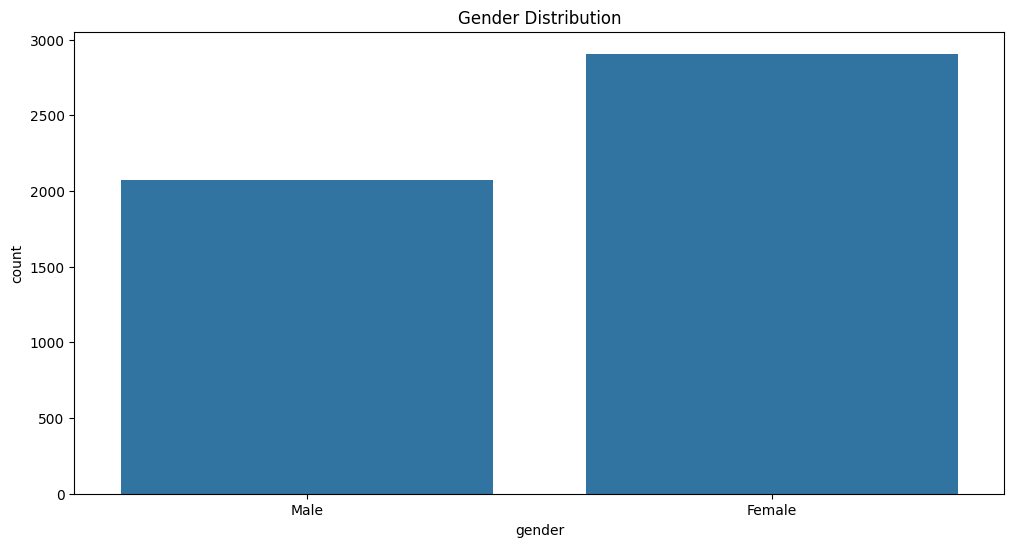

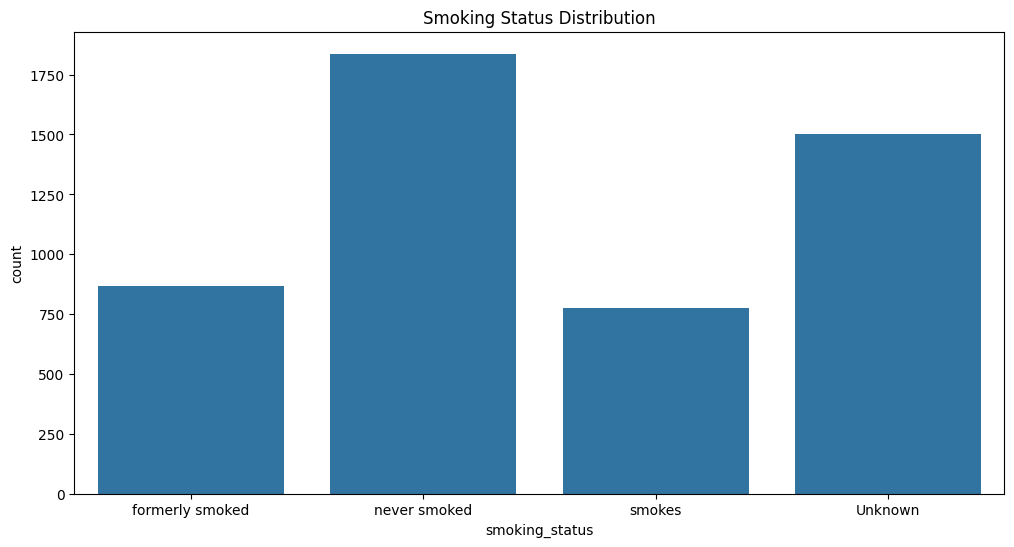

In [51]:
# Frequency counts for categorical variables
gender_counts = df['gender'].value_counts()
smoking_status_counts = df['smoking_status'].value_counts()

print("Gender counts:\n", gender_counts)
print("Smoking status counts:\n", smoking_status_counts)

# Bar plot for categorical variables
plt.figure(figsize=(12, 6))
sns.countplot(x='gender', data=df)
plt.title('Gender Distribution')
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(x='smoking_status', data=df)
plt.title('Smoking Status Distribution')
plt.show()

In [52]:
# Cross-tabulation of stroke occurrences by gender
stroke_by_gender = pd.crosstab(df['gender'], df['stroke'])
print(stroke_by_gender)

# Cross-tabulation of stroke occurrences by hypertension status
stroke_by_hypertension = pd.crosstab(df['hypertension'], df['stroke'])
print(stroke_by_hypertension)

stroke     0    1
gender           
Female  2767  140
Male    1966  108
stroke           0    1
hypertension           
0             4320  182
1              413   66


In [53]:
# Group by hypertension and calculate mean age
mean_age_by_hypertension = df.groupby('hypertension')['age'].mean()
print(mean_age_by_hypertension)

# Group by stroke and calculate mean BMI
mean_bmi_by_stroke = df.groupby('stroke')['bmi'].mean()
print(mean_bmi_by_stroke)

hypertension
0    41.364131
1    62.741127
Name: age, dtype: float64
stroke
0    28.409698
1    30.186694
Name: bmi, dtype: float64


# **1. Decision Tree **

In [54]:
d = {'formerly smoked': 0, 'never smoked': 1, 'smokes': 2, 'Unknown' : 3}
df['smoking_status'] = df['smoking_status'].map(d)
print(df.head())

   gender   age  hypertension  heart_disease ever_married      work_type  \
0    Male  67.0             0              1          Yes        Private   
1    Male  80.0             0              1          Yes        Private   
2  Female  49.0             0              0          Yes        Private   
3  Female  79.0             1              0          Yes  Self-employed   
4    Male  81.0             0              0          Yes        Private   

  Residence_type  avg_glucose_level   bmi  smoking_status  stroke  
0          Urban             228.69  36.6               0       1  
1          Rural             105.92  32.5               1       1  
2          Urban             171.23  34.4               2       1  
3          Rural             174.12  24.0               1       1  
4          Urban             186.21  29.0               0       1  


In [55]:
X1 = df[['smoking_status','avg_glucose_level']]
y1 = df['stroke']
print(X1.head())
print(y1.head())


   smoking_status  avg_glucose_level
0               0             228.69
1               1             105.92
2               2             171.23
3               1             174.12
4               0             186.21
0    1
1    1
2    1
3    1
4    1
Name: stroke, dtype: int64


In [56]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.25, random_state=42)


In [57]:
dtree3 = DecisionTreeClassifier(max_depth=3)
dtree3.fit(X1_train, y1_train)

DecisionTreeClassifier(max_depth=3)

In [58]:
y1_pred = dtree3.predict(X1_test)

In [59]:
cm1 = confusion_matrix(y1_test, y1_pred)

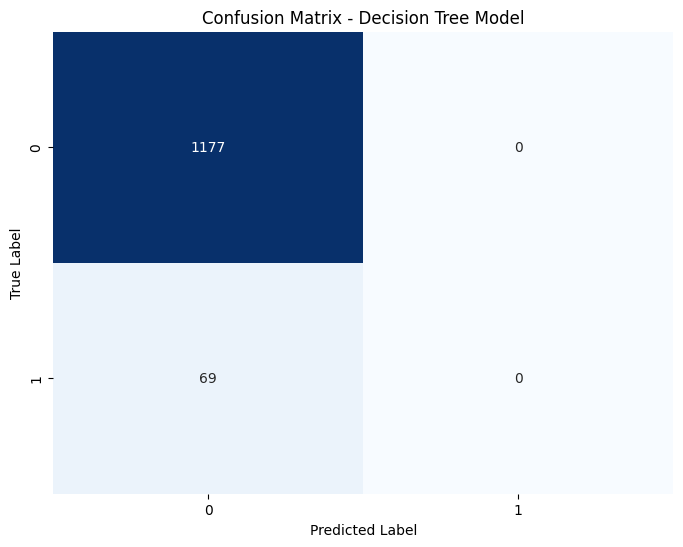

In [60]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm1, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Decision Tree Model')
plt.show()

In [61]:
accuracy1 = accuracy_score(y1_test, y1_pred)
print("Accuracy:", accuracy1)

Accuracy: 0.9446227929373997


In [62]:
print(classification_report(y1_test, y1_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1177
           1       0.00      0.00      0.00        69

    accuracy                           0.94      1246
   macro avg       0.47      0.50      0.49      1246
weighted avg       0.89      0.94      0.92      1246



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


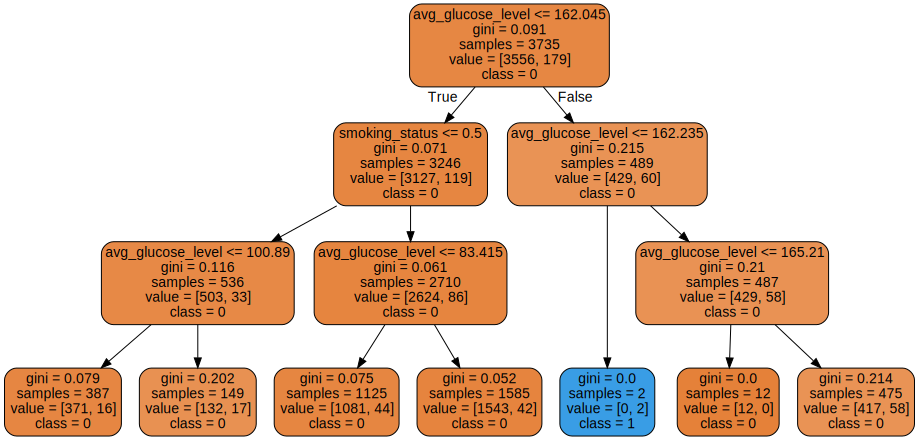

In [63]:
export_graphviz(decision_tree=dtree3,
out_file='C:\Residence_type.dot',
feature_names=X1_test.columns,
class_names=dtree3.classes_.astype(str),
leaves_parallel=True,
filled=True,
rotate=False,
rounded=True)
from graphviz import Source
Source.from_file('C:\Residence_type.dot')

## **2. Decision Tree Extention**

In [64]:
d = {'Yes' : 0, 'No' : 1}
df['ever_married'] = df['ever_married'].map(d)
print(df.head())

   gender   age  hypertension  heart_disease  ever_married      work_type  \
0    Male  67.0             0              1             0        Private   
1    Male  80.0             0              1             0        Private   
2  Female  49.0             0              0             0        Private   
3  Female  79.0             1              0             0  Self-employed   
4    Male  81.0             0              0             0        Private   

  Residence_type  avg_glucose_level   bmi  smoking_status  stroke  
0          Urban             228.69  36.6               0       1  
1          Rural             105.92  32.5               1       1  
2          Urban             171.23  34.4               2       1  
3          Rural             174.12  24.0               1       1  
4          Urban             186.21  29.0               0       1  


In [65]:
X2 = df[['smoking_status','avg_glucose_level','ever_married']]
y2 = df['stroke']
print(X2.head())
print(y2.head())

   smoking_status  avg_glucose_level  ever_married
0               0             228.69             0
1               1             105.92             0
2               2             171.23             0
3               1             174.12             0
4               0             186.21             0
0    1
1    1
2    1
3    1
4    1
Name: stroke, dtype: int64


In [66]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.25, random_state=0)
dtree3 = DecisionTreeClassifier(max_depth=4)
dtree3.fit(X2_train, y2_train)
y2_pred = dtree3.predict(X2_test)

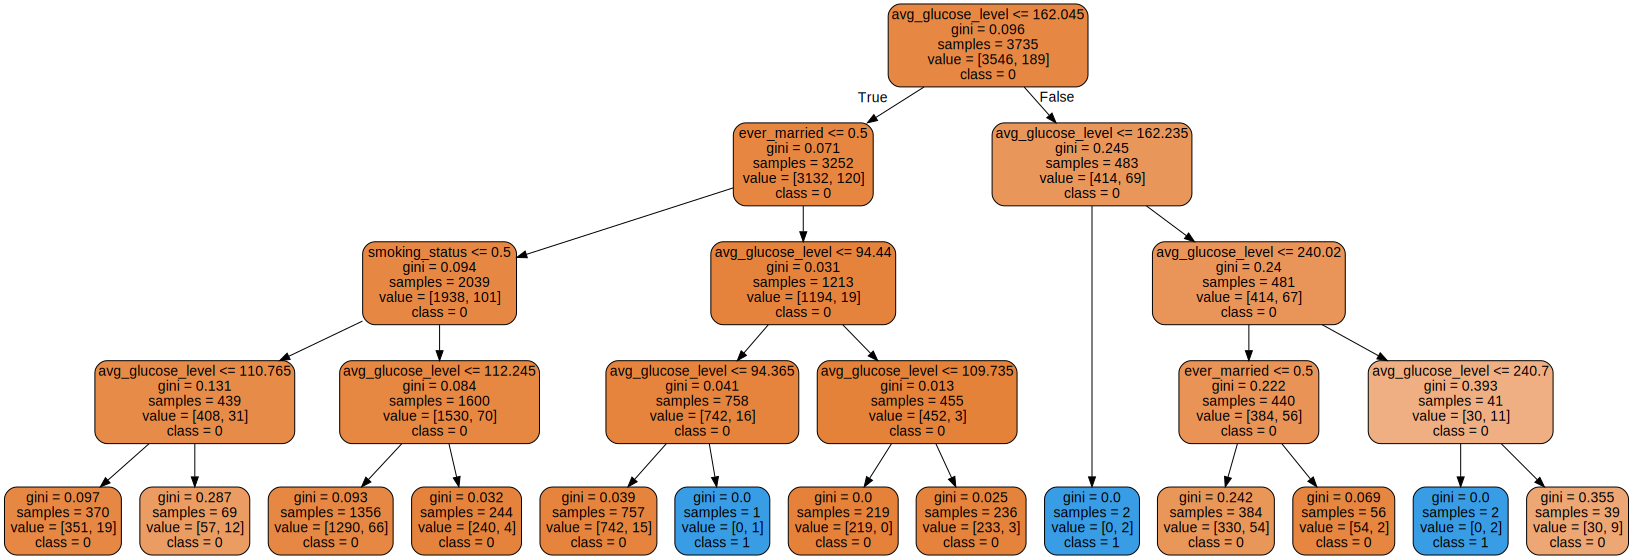

In [67]:
export_graphviz(decision_tree=dtree3,
out_file='C:\Residence_type.dot',
feature_names=X2_test.columns,
class_names=dtree3.classes_.astype(str),
leaves_parallel=True,
filled=True,
rotate=False,
rounded=True)
from graphviz import Source
Source.from_file('C:\Residence_type.dot')

In [68]:
accuracy2 = accuracy_score(y2_test, y2_pred)
print("Accuracy:", accuracy2)

Accuracy: 0.9510433386837881


# **LOGISTIC REGRESSION**

In [69]:
df4 = df.copy()
df4.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,0,Private,Urban,228.69,36.6,0,1
1,Male,80.0,0,1,0,Private,Rural,105.92,32.5,1,1
2,Female,49.0,0,0,0,Private,Urban,171.23,34.4,2,1
3,Female,79.0,1,0,0,Self-employed,Rural,174.12,24.0,1,1
4,Male,81.0,0,0,0,Private,Urban,186.21,29.0,0,1


In [70]:
X4 = df4[['avg_glucose_level', 'bmi']]
y4 = df4['ever_married']
X4.head()

,avg_glucose_level,bmi
0,228.69,36.6
1,105.92,32.5
2,171.23,34.4
3,174.12,24.0
4,186.21,29.0


In [71]:
from sklearn.preprocessing import StandardScaler
# Standardizing the data
scaler = StandardScaler()
scaler.fit(X4)
X4_scaled = scaler.transform(X4)
df_scaled = pd.DataFrame(X4_scaled, columns=X4.columns)
df_scaled.head()

,avg_glucose_level,bmi
0,2.723411,1.193238
1,-0.000523,0.589390
2,1.448529,0.869222
3,1.512650,-0.662492
4,1.780895,0.073909


In [72]:
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.30, random_state=42)

In [73]:
from sklearn.linear_model import LogisticRegression
# Building the logistic regression model
logreg = LogisticRegression()
logreg.fit(X4_train, y4_train)

LogisticRegression()

In [74]:
# Predicting the target variable
y4_pred = logreg.predict(X4_test)

In [75]:
# Finding the accuracy score
accuracy4 = accuracy_score(y4_test, y4_pred)
print("Accuracy:", accuracy4)

Accuracy: 0.7397993311036789


In [76]:
print(classification_report(y4_test, y4_pred))

              precision    recall  f1-score   support

           0       0.77      0.87      0.82       989
           1       0.66      0.48      0.55       506

    accuracy                           0.74      1495
   macro avg       0.71      0.68      0.68      1495
weighted avg       0.73      0.74      0.73      1495



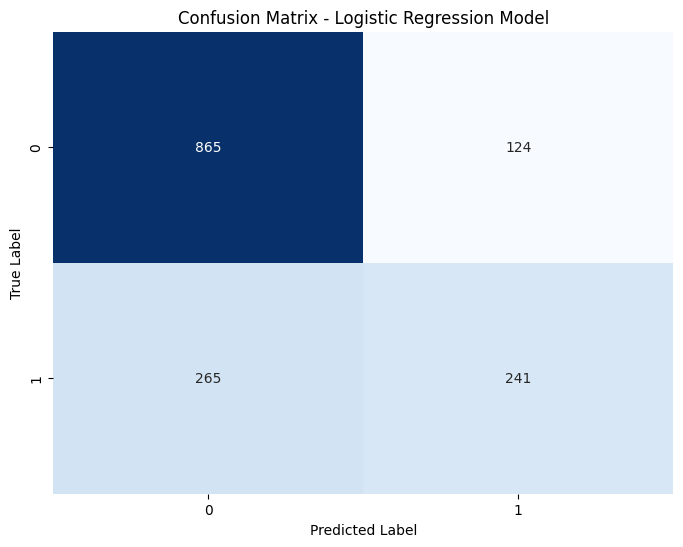

In [77]:
# Calculate the confusion matrix
cm3 = confusion_matrix(y4_test, y4_pred)
# Plot the confusion matrix using seaborn's heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm3, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Logistic Regression Model')
plt.show()

### **KNN MODEL**

In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [79]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [80]:
df = pd.read_csv('/content/drive/MyDrive/brain_stroke.csv')
print(df.head())

   gender   age  hypertension  heart_disease ever_married      work_type  \
0    Male  67.0             0              1          Yes        Private   
1    Male  80.0             0              1          Yes        Private   
2  Female  49.0             0              0          Yes        Private   
3  Female  79.0             1              0          Yes  Self-employed   
4    Male  81.0             0              0          Yes        Private   

  Residence_type  avg_glucose_level   bmi   smoking_status  stroke  
0          Urban             228.69  36.6  formerly smoked       1  
1          Rural             105.92  32.5     never smoked       1  
2          Urban             171.23  34.4           smokes       1  
3          Rural             174.12  24.0     never smoked       1  
4          Urban             186.21  29.0  formerly smoked       1  


In [81]:
X5 = df[['age', 'bmi']]
y5 = df['hypertension']

In [82]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X5)
X5_scaled = scaler.transform(X5)

In [83]:
df_scaled = pd.DataFrame(X5_scaled, columns=X5.columns)
df_scaled.head()


,age,bmi
0,1.040584,1.193238
1,1.614270,0.589390
2,0.246250,0.869222
3,1.570141,-0.662492
4,1.658400,0.073909


In [84]:
from sklearn.model_selection import train_test_split
# Splitting the data into train and test sets:
X5_train, X5_test, y5_train, y5_test = train_test_split(df_scaled, y5, test_size=0.20, random_state=42)

In [85]:
# Importing the KNeighborsClassifier class from the sklearn.neighbors library:
from sklearn.neighbors import KNeighborsClassifier

In [86]:
# Building the model
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X5_train, y5_train)

KNeighborsClassifier(n_neighbors=7)

In [87]:
# Classifying the records of the X5_test using the model:
y5_pred = knn.predict(X5_test)


In [88]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [89]:
cm5 = confusion_matrix(y5_test, y5_pred)

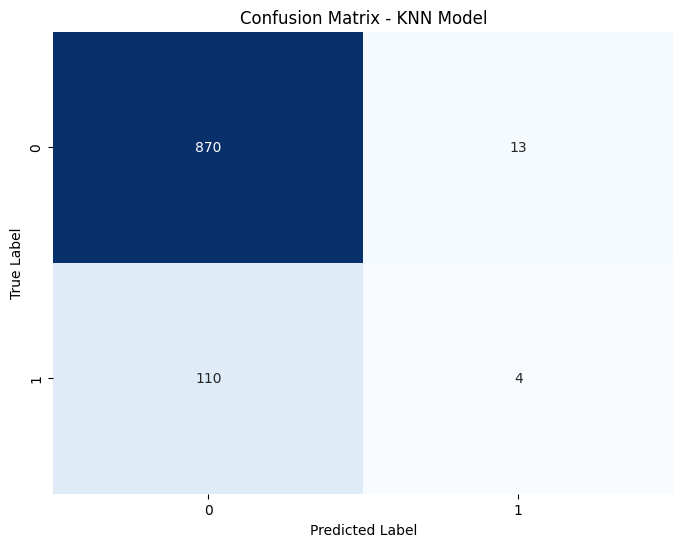

In [90]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm5, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - KNN Model')
plt.show()


In [91]:
accuracy5 = accuracy_score(y5_test, y5_pred)
print("Accuracy:", accuracy5)

Accuracy: 0.876629889669007


In [92]:
print(classification_report(y5_test, y5_pred))


              precision    recall  f1-score   support

           0       0.89      0.99      0.93       883
           1       0.24      0.04      0.06       114

    accuracy                           0.88       997
   macro avg       0.56      0.51      0.50       997
weighted avg       0.81      0.88      0.83       997

